In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from difflib import SequenceMatcher
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

In [35]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 4)

In [36]:
ipc_path = "ipc.xlsx" 
market = pd.read_excel(ipc_path, index_col=0)
market.columns = [c.replace(" MF Equity", "").replace(" INDEX", "").replace("*", "") for c in market.columns]
#market.T.index
market.head()

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA,MEXBOL
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [37]:
df_emisoras = pd.read_csv("bmv_emisoras.csv")
df_emisoras.index

RangeIndex(start=0, stop=139, step=1)

In [38]:
#Se limipian los datos
coincidencias = list()
grupo_coincidencia = list()

for i in range(len(df_emisoras['key'])):
    if df_emisoras['key'][i] == 'TLEVISA':
        df_emisoras['key'][i] = 'TLEVICPO'

for j in range(len(list(market.columns))):
    for i in range(len(list(df_emisoras['key']))):
        if (market.columns[j].find(list(df_emisoras['key'])[i]) != -1) and (len(list(df_emisoras['key'])[i]) >= 2):
            coincidencias.append(market.columns[j])
            grupo_coincidencia.append(list(df_emisoras['Sector'])[i])

In [39]:
datafr = pd.DataFrame()
datafr['Equity'] = coincidencias
datafr['Sector'] = grupo_coincidencia

In [40]:
datafr.drop([25],inplace=True)
datafr


,Equity,Sector
0,KIMBERA,PRODUCTOS DE CONSUMO FRECUENTE
1,GAPB,INDUSTRIAL
2,CEMEXCPO,MATERIALES
3,ASURB,INDUSTRIAL
4,GFNORTEO,SERVICIOS FINANCIEROS
5,KOFUBL,PRODUCTOS DE CONSUMO FRECUENTE
6,AC,PRODUCTOS DE CONSUMO FRECUENTE
7,LABB,SALUD
8,FEMSAUBD,PRODUCTOS DE CONSUMO FRECUENTE
9,OMAB,INDUSTRIAL


In [21]:
datafr2 = pd.DataFrame([['RA', 'SERVICIOS FINANCIEROS']], columns=list(['Equity','Sector']))
datafr2 = datafr.append(datafr2, ignore_index=True)

In [46]:
lista_sectores = list(set(datafr['Sector'].tolist()))
lista_sectores

Dict = {}

for i in range(len(lista_sectores)):
    Dict[lista_sectores[i]] = datafr[datafr.Sector == lista_sectores[i]]['Equity'].tolist()

for i in range(len(lista_sectores)):
    market[lista_sectores[i]] = market[myDict[lista_sectores[i]]].mean(axis=1)

In [47]:
lista_sectores.append('MEXBOL')
lista_sectores

['MATERIALES',
 'PRODUCTOS DE CONSUMO FRECUENTE',
 'ENERGÍA',
 'SALUD',
 'SERVICIOS DE TELECOMUNICACIONES',
 'SERVICIOS Y BIENES DE CONSUMO NO BÁSICO',
 'INDUSTRIAL',
 'SERVICIOS FINANCIEROS',
 'MEXBOL']

In [48]:
market = market[lista_sectores]

In [49]:
window = 10
market_t = market.copy()
rolling_mean = market_t.rolling(window).mean()
rolling_std =  market_t.rolling(window).std()
market_t = (market_t - rolling_mean) / rolling_std
market_t = market_t.dropna()


In [50]:

(market_t["MEXBOL"].pct_change() > 0).value_counts()

False    640
True     397
Name: MEXBOL, dtype: int64

In [51]:
from statsmodels.tsa.stattools import adfuller

adfuller(market_t["MEXBOL"])

# Limpiando información
y = (market_t["MEXBOL"].diff().shift(-1) > 0) * 1.0
X = market_t.drop("MEXBOL", axis=1).join(y, how="inner")

y = X["MEXBOL"]
X = X.drop("MEXBOL", axis=1)

In [52]:
train_period = "2019-10"
test_period = "2019-11-20"
Xtrain, ytrain = X[:train_period], y[:train_period]
Xtest, ytest = X[:test_period], y[:test_period]

In [53]:
##Parea realizar el modelo se crea la regresion logistica
logistic = LogisticRegression()

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0, )

In [56]:
best_model = clf.fit(Xtrain, ytrain)
best_model.best_params_
best_model.best_score_

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.6004036326942482

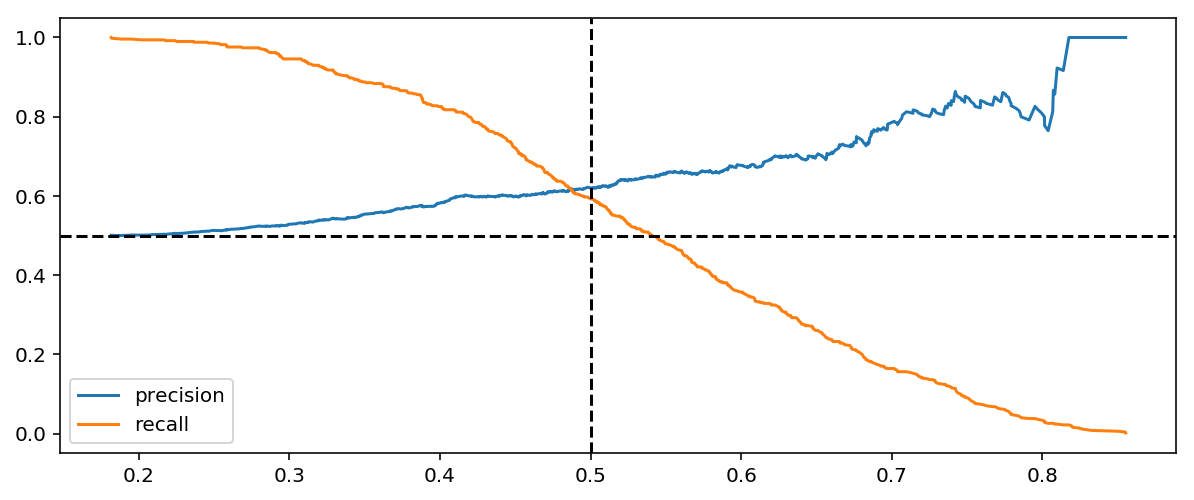

In [57]:
proba_estimate = best_model.predict_proba(Xtest)[:, 1]
prec, recall, threshold = precision_recall_curve(ytest, proba_estimate)

plt.plot(threshold, prec[:-1], label="precision")
plt.plot(threshold, recall[:-1], label="recall")
plt.legend()
plt.axvline(x=0.5, linestyle="--", c="black")
plt.axhline(y=0.5, linestyle="--", c="black")
